In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.insert(0, "../code-previous")
sys.path.insert(0, "..")

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import sklearn.feature_extraction as skfeatures
import utils
import time
import os

import nltk
stopwords = nltk.corpus.stopwords.words('english')

from unicodedata import category
from tqdm import tqdm
tqdm.pandas(desc="Progress")

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt


path2rawdata = '/mnt/disks/vault/wos2017-parsed/'

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
raw_data_path = "/mnt/disks/vault/analysis-data/raw_data_full/raw_data_full.pql"
data = pd.read_pickle(raw_data_path)

In [5]:
# New fields to dataframe 
data['log_c5'] = data['c5'].progress_apply(lambda x: np.log(x+1))
data['character_count'] = data['Title'].progress_apply(lambda x: len(x))
data["word_count"] = data["Title"].progress_apply(lambda x: len(x.split()))
data['title_without_punct'] = data['Title'].progress_apply(lambda x: 
                                                           str.lower(''.join(ch for ch in str(x) if category(ch)[0] != 'P')))
data["title_without_stopwords"] = data['title_without_punct'].progress_apply(lambda x: 
                                                                            " ".join([word for word in x.split() if word not in stopwords]))


data["word_count"] = data["Title"].progress_apply(lambda x: len(x.split()))
data["cleaned_title_word_count"] = data["title_without_stopwords"].progress_apply(lambda x: len(x.split()))

Progress: 100%|██████████| 738469/738469 [00:01<00:00, 599694.76it/s]


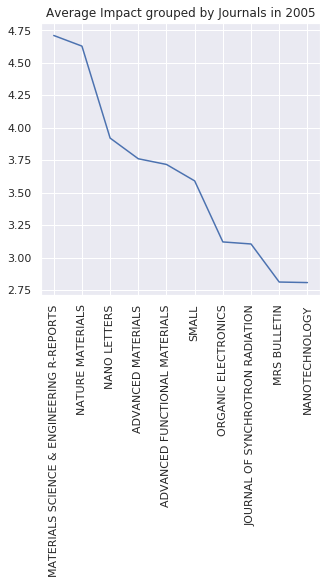

In [44]:
tmp = data[data.PubYear_x == 2005]

# average number of publications for each journal
tmp = tmp.groupby(['Journal'], as_index=False)['c5'].mean().reset_index()
tmp["log_avg_c5"] = tmp['c5'].apply(lambda x: np.log(x))


tmp1 = tmp.sort_values('log_avg_c5', ascending=False)[:10]

f = plt.figure(figsize=(5,5))
a1 = f.add_subplot(111)
plt.xticks(rotation=90)
a1.set_title("Average Impact grouped by Journals in 2005")
a1.plot(tmp1['Journal'], tmp1['log_avg_c5'], 'b')

In [58]:
# Lengths of article titles in a journal
tmp2 = data[(data.PubYear_x == 2005) & (data.Journal == 'MATERIALS SCIENCE & ENGINEERING R-REPORTS')]
tmp2 = tmp2.sort_values('c5', ascending=False)
tmp2[['c5','word_count','character_count','cleaned_title_word_count']]

,c5,word_count,character_count,cleaned_title_word_count
411637,319.0,5,36,4
416819,213.0,6,42,5
416564,209.0,11,72,7
416915,156.0,9,73,7
418522,127.0,6,45,5
433805,68.0,9,42,5
408146,45.0,8,62,5
418842,33.0,6,39,3
420077,18.0,13,104,9
428252,18.0,7,63,5


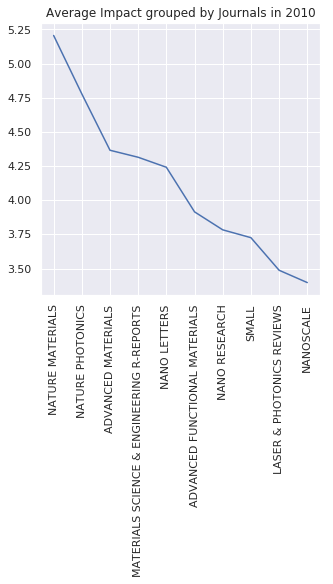

In [30]:
tmp = data[data.PubYear_x == 2010]

# average number of publications for each journal
tmp = tmp.groupby(['Journal'], as_index=False)['c5'].mean().reset_index()
tmp["log_avg_c5"] = tmp['c5'].apply(lambda x: np.log(x))
tmp = tmp.sort_values('log_avg_c5', ascending=False)[:10]

f = plt.figure(figsize=(5,5))
a1 = f.add_subplot(111)

plt.xticks(rotation=90)
a1.set_title("Average Impact grouped by Journals in 2010")

a1.plot(tmp['Journal'], tmp['log_avg_c5'], 'b')


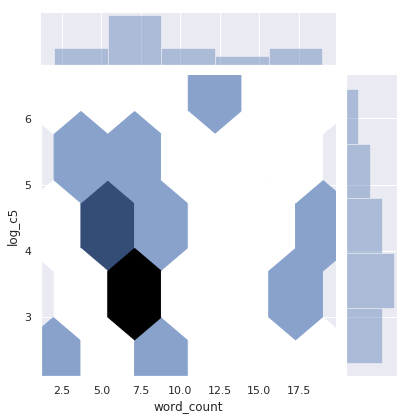

In [75]:
tmp2 = data[(data.PubYear_x == 2000) & (data.Journal == 'MATERIALS SCIENCE & ENGINEERING R-REPORTS')]
tmp2 = tmp2.sort_values('c5', ascending=False)
#tmp2[['c5','word_count','character_count','cleaned_title_word_count']]

g = sns.jointplot("word_count", "log_c5", data=tmp2, kind="hex", color="b")

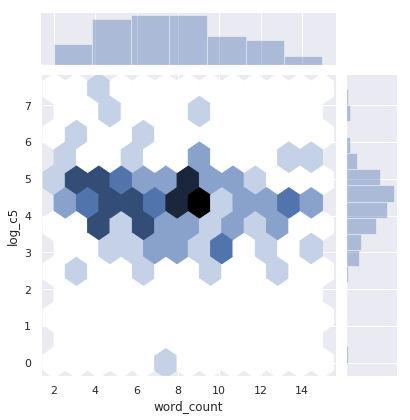

In [69]:
tmp2 = data[(data.PubYear_x == 2010) & (data.Journal == 'NATURE PHOTONICS')]
tmp2 = tmp2.sort_values('c5', ascending=False)
#tmp2[['c5','word_count','character_count','cleaned_title_word_count']]

g = sns.jointplot("word_count", "log_c5", data=tmp2, kind="hex", color="b")

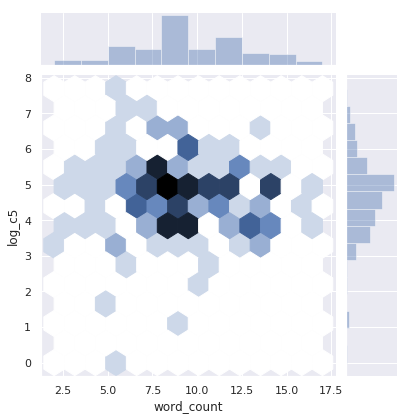

In [70]:
tmp2 = data[(data.PubYear_x == 2010) & (data.Journal == 'NATURE MATERIALS')]
tmp2 = tmp2.sort_values('c5', ascending=False)
#tmp2[['c5','word_count','character_count','cleaned_title_word_count']]

g = sns.jointplot("word_count", "log_c5", data=tmp2, kind="hex", color="b")

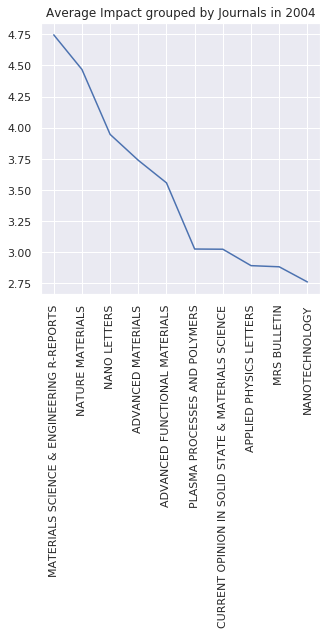

In [31]:
tmp = data[data.PubYear_x == 2004]

# average number of publications for each journal
tmp = tmp.groupby(['Journal'], as_index=False)['c5'].mean().reset_index()
tmp["log_avg_c5"] = tmp['c5'].apply(lambda x: np.log(x))
tmp = tmp.sort_values('log_avg_c5', ascending=False)[:10]

f = plt.figure(figsize=(5,5))
a1 = f.add_subplot(111)
a1.set_title("Average Impact grouped by Journals in 2004")
plt.xticks(rotation=90)
a1.plot(tmp['Journal'], tmp['log_avg_c5'], 'b')


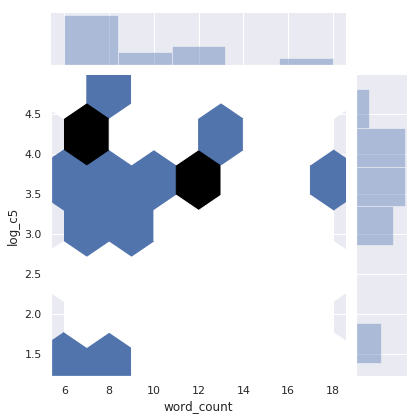

In [81]:
tmp2 = data[(data.PubYear_x == 2003) & (data.Journal == 'MATERIALS SCIENCE & ENGINEERING R-REPORTS')]
tmp2 = tmp2.sort_values('c5', ascending=False)
#tmp2[['c5','word_count','character_count','cleaned_title_word_count']]

g = sns.jointplot("word_count", "log_c5", data=tmp2, kind="hex", color="b")

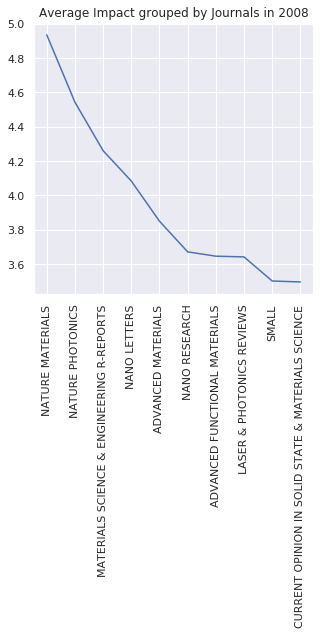

In [34]:
tmp = data[data.PubYear_x == 2008]

# average number of publications for each journal
tmp = tmp.groupby(['Journal'], as_index=False)['c5'].mean().reset_index()
tmp["log_avg_c5"] = tmp['c5'].apply(lambda x: np.log(x))
tmp = tmp.sort_values('log_avg_c5', ascending=False)[:10]

f = plt.figure(figsize=(5,5))
a1 = f.add_subplot(111)
a1.set_title("Average Impact grouped by Journals in 2008")

plt.xticks(rotation=90)
a1.plot(tmp['Journal'], tmp['log_avg_c5'], 'b')


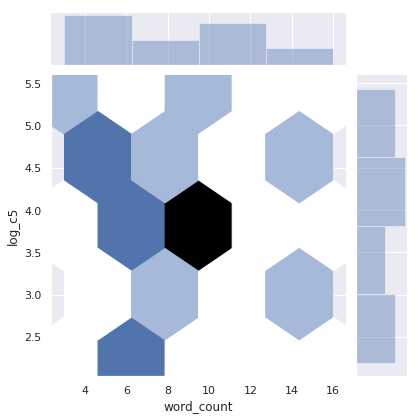

In [66]:
tmp2 = data[(data.PubYear_x == 2008) & (data.Journal == 'MATERIALS SCIENCE & ENGINEERING R-REPORTS')]
tmp2 = tmp2.sort_values('c5', ascending=False)
#tmp2[['c5','word_count','character_count','cleaned_title_word_count']]

g = sns.jointplot("word_count", "log_c5", data=tmp2, kind="hex", color="b")

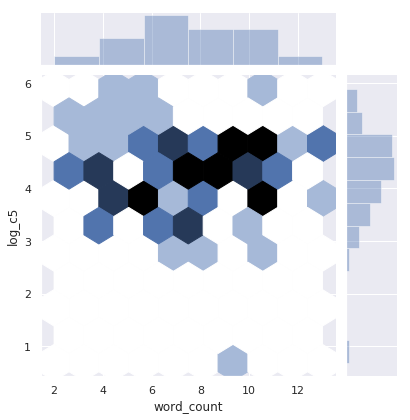

In [67]:
tmp2 = data[(data.PubYear_x == 2008) & (data.Journal == 'NATURE PHOTONICS')]
tmp2 = tmp2.sort_values('c5', ascending=False)
#tmp2[['c5','word_count','character_count','cleaned_title_word_count']]

g = sns.jointplot("word_count", "log_c5", data=tmp2, kind="hex", color="b")

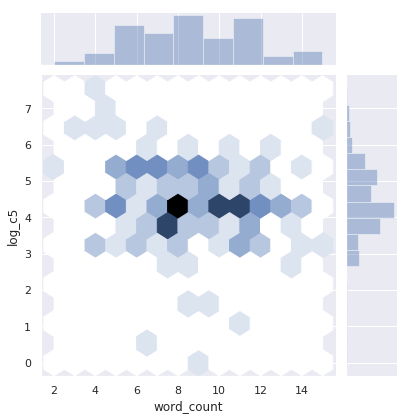

In [68]:
tmp2 = data[(data.PubYear_x == 2008) & (data.Journal == 'NATURE MATERIALS')]
tmp2 = tmp2.sort_values('c5', ascending=False)
#tmp2[['c5','word_count','character_count','cleaned_title_word_count']]

g = sns.jointplot("word_count", "log_c5", data=tmp2, kind="hex", color="b")

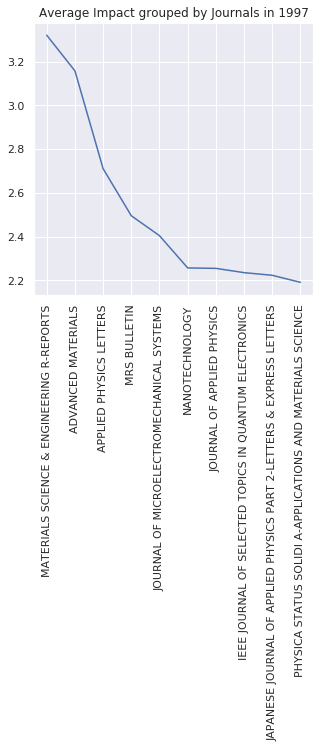

In [40]:
tmp = data[data.PubYear_x == 1997]

# average number of publications for each journal
tmp = tmp.groupby(['Journal'], as_index=False)['c5'].mean().reset_index()
tmp["log_avg_c5"] = tmp['c5'].apply(lambda x: np.log(x))
tmp = tmp.sort_values('log_avg_c5', ascending=False)[:10]

f = plt.figure(figsize=(5,5))
a1 = f.add_subplot(111)
a1.set_title("Average Impact grouped by Journals in 1997")

plt.xticks(rotation=90)
a1.plot(tmp['Journal'], tmp['log_avg_c5'], 'b')


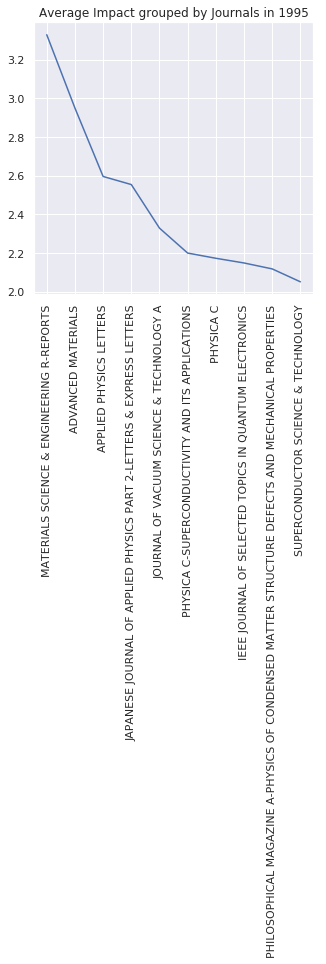

In [36]:
tmp = data[data.PubYear_x == 1995]
# average number of publications for each journal
tmp = tmp.groupby(['Journal'], as_index=False)['c5'].mean().reset_index()
tmp["log_avg_c5"] = tmp['c5'].apply(lambda x: np.log(x))
tmp = tmp.sort_values('log_avg_c5', ascending=False)[:10]

f = plt.figure(figsize=(5,5))
a1 = f.add_subplot(111)
a1.set_title("Average Impact grouped by Journals in 1995")

plt.xticks(rotation=90)
a1.plot(tmp['Journal'], tmp['log_avg_c5'], 'b')
